# Programming Assignment 2 : Linear Regression

## Instructions:

## Marks: 100
## Due Date: March 11, 2025, 23:55

## Instructions

*   Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be 'RollNo_PA2'.

* The datasets required for this assignment is provided along with this assignment (Dataset1, Dataset2 and Dataset3).

*   The code MUST be implemented independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC.

* 10% penalty per day for 3 days after due date. No submissions will be accepted after  that.


* Use procedural programming style and comment your code properly.

* **Deadline to submit this assignment is March 11, 2025, 23:55**
* Make sure to run all blocks before submission.

### Goal:

The goal of this assignment is to get you familiar with Linear Regression and to give hands on experience of basic python tools and libraries which will be used in implementing the algorithm.

### Note:

You are <font color="red">not allowed </font> to use scikit-learn or any other machine learning toolkit for part 1 and 2. You have to implement your own Linear Regression model from scratch. You may use Pandas, NumPy, Matplotlib and other standard python libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Part 1: Simple Linear Regression (10 Marks)

## Dataset:
The Dataset for this part is provided in the included zip folder within the folder labelled "DataSet1". In case you are doing this assignment on colab, please upload the datafile to colab before starting.

The dataset you have been provided contains the the daily readings for 2 years of soil moisture at 2 different depths. The sensor TDT5 measures the soil moisture at the surface level whereas TDT6 measures at the depth where the water is avaliable for plants (known as rootzone soil moisture). Not all of the surface soil moisture is reaches the rootzone therefore you would find the difference in the two sensor's readings. Your goal is to use the surface sensor reading as input to predict the rootzone soil moisture value i.e.:
    
*   **Input** : TDT5_VWC (units : %)
*   **Output** : TDT6_VWC (units : %)

Note : The soil moisture dataset belongs to [COSMOS-UK](https://cosmos.ceh.ac.uk/) and has been downloaded from the [ELMST](https://cosmos.ceh.ac.uk/sites/ELMST) sensor monitoring site.

In [ ]:
# Read the data using pandas.
dataset = pd.read_csv('D:\\LUMS\\Semester 1\\CV\\download material\\CV Assignments\\Dataset\\Dataset1\\cosmos-uk-1-features.csv')
dataset.head()


,TimeStamp,TDT5_VWC,TDT6_VWC
0,2017-01-01 12:00:00+00:00,24.165,21.050
1,2017-01-02 12:00:00+00:00,23.654,20.298
2,2017-01-03 12:00:00+00:00,23.070,19.928
3,2017-01-04 12:00:00+00:00,22.958,19.803
4,2017-01-05 12:00:00+00:00,22.879,19.637


In [ ]:
# Extract features and target
X = dataset['TDT5_VWC'].values.reshape(-1,1)  # Features (input)
y = dataset['TDT6_VWC'].values                # Target (output)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (584, 1)
y_train shape: (584,)
X_test shape: (146, 1)
y_test shape: (146,)


## Tasks:

Implement Linear Regression from scratch. You will implement the following functions:

* Predict function:
    This function calculates the hypothesis for the input sample given the values of weights.
    \begin{equation*}
        h(x,{\theta}) = \theta_0 + \theta_1 x,
        \end{equation*}

     where $${\theta} \in \mathbb{R}^{2} $$ is the weight vector given by $${\theta} = [ \theta_0, \theta_1]^T $$
    

In [ ]:
def predict(X,theta0,theta1):
    # X --> Data point
    return theta0 + theta1 * X

<li>Mean Square Error Function: This function calculates the cost of using weights as parameters for linear regression. The formula to calculate Mean Square Error is given below:</li>

\begin{equation*}
        J(\theta_0,\theta_1) =\frac{1}{2n} \sum_{i=1}^{n} (\hat{y}^i - y^i)^2,
        \end{equation*}
 where $y^i$ and $\hat{y}^i$ are the actual and predicted labels of the $i$-th training instance respectively and $n$ is the total number of training samples.

In [ ]:
def mean_square_error(X,Y,theta0,theta1):
    # X -> data point
    # Y -> True value corresponding to that point X
    # Your code

    n = len(Y)
    predictions = theta0 + theta1 * X
    mse = (1 / (2 * n)) * np.sum((predictions - Y) ** 2)
    return mse

* Batch Gradient Descent: This function learns the values of weights when given as parameters the learning rate $\alpha$ and the number of iterations called epoch.
Experiment with different values to determine the best parameters.

For $j=0$ and $j=1$ repeat until convergence \{

$ \qquad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}  J(\theta_0,\theta_1)$

\}


In [ ]:
def gradient_descent(X,Y,alpha,epochs):
    # X -> train_x
    # Y -> train_y

    theta0 = 0
    theta1 = 0
    m = len(Y)
    J = []
    for epoch in range(epochs):
        # Your code
        # Call your predict function.
        # Modify your Theta_0 and Theta_1 accordingly.
        # Append Cost to J
        predictions = predict(X, theta0, theta1)
        error = predictions - Y

        #  gradients
        theta0 -= alpha * (1 / m) * np.sum(error)
        theta1 -= alpha * (1 / m) * np.sum(error * X)

        cost = mean_square_error(X, Y, theta0, theta1)
        J.append(cost)

    return theta0, theta1, J


In [ ]:
alpha=0.0001
epochs=100

X = X_train
Y = y_train

# Run your code here to compute cost
# Train using gradient descent
theta0, theta1, cost_history = gradient_descent(X, Y, alpha, epochs)

print(f"theta0: {theta0}")
print(f"theta1: {theta1}")
print(f"cost: {cost_history[-1]}")

theta0: -2.3120384095783602e+184
theta1: -8.36721189503952e+185
cost: inf


d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\PC\AppData\Local\Temp\ipykernel_11784\1437975514.py:8: RuntimeWarning: overflow encountered in square
  mse = (1 / (2 * n)) * np.sum((predictions - Y) ** 2)


Fixing the cost by adjusting the alpha and epochs

In [ ]:
# Feature Scaling
X_train_scaled = (X_train - np.mean(X_train)) / np.std(X_train)

# Reduce learning rate
alpha = 0.00001
epochs = 100

# Train using gradient descent
theta0, theta1, cost_history = gradient_descent(X_train_scaled, y_train, alpha, epochs)

# Printing results
print(f"Intermediate theta0: {theta0}")
print(f"Intermediate theta1: {theta1}")
print(f"Intermediate cost: {cost_history[-1]}")


Intermediate theta0: 12.956371702933518
Intermediate theta1: 6.133171291989975e-15
Intermediate cost: 99766.05992143965


* Use a value of $\alpha$ $<$ $0.0001$ and epochs $>$ 100
* Your Minimum Cost on your train set should be around 11-15


In [ ]:
# Feature Scaling
X_train_scaled = (X_train - np.mean(X_train)) / np.std(X_train)
y_train_scaled = (y_train - np.mean(y_train)) / np.std(y_train)  # Scale y as well

# Updated Hyperparameters
alpha = 0.00005  # Slightly increased learning rate
epochs = 2000  # More iterations

# Train using gradient descent
theta0, theta1, cost_history = gradient_descent(X_train_scaled, y_train_scaled, alpha, epochs)

# Print final values
print(f"Final theta0: {theta0}")
print(f"Final theta1: {theta1}")
print(f"Final cost: {cost_history[-1]}")


Final theta0: 5.554719545821962e-17
Final theta1: 1.2166827667126725e-21
Final cost: 292.0


Re adjusting

In [ ]:
# Min-Max Scaling
X_min, X_max = X_train.min(), X_train.max()
y_min, y_max = y_train.min(), y_train.max()

X_train_scaled = (X_train - X_min) / (X_max - X_min)
y_train_scaled = (y_train - y_min) / (y_max - y_min)

# Updated Hyperparameters
alpha = 0.0001  # Increase learning rate
epochs = 3000  # More iterations

# Train using gradient descent
theta0, theta1, cost_history = gradient_descent(X_train_scaled, y_train_scaled, alpha, epochs)

# Convert back to original scale
theta0 = y_min + theta0 * (y_max - y_min)
theta1 = theta1 * (y_max - y_min) / (X_max - X_min)

# Print final values
print(f"Full n Final theta0: {theta0}")
print(f"Full n Final theta1: {theta1}")
print(f"Full n Final cost: {cost_history[-1]}")


Full n Final theta0: 29.22647831932381
Full n Final theta1: 9.629254995312376e-05
Full n Final cost: 16.043020153734904


### Question:
Given the data and the number of epochs why a low learning rate is being used? Explain in terms of varying the learning rates over different set of values for the same gradient descent function. Please answer by adding a markdown underneath this question.


A low learning rate (e.g., 0.0001) is used in gradient descent to:<br>
1. Prevent Overshooting
- A high learning rate can cause weight updates to be too large, making the model unstable.
- A low learning rate ensures steady, stable convergence.
2. Handle Scaled Data
- Since the input features (TDT5_VWC and TDT6_VWC) are min-max scaled to [0,1], large updates can push values too far.
- A lower learning rate keeps updates controlled.
3. Balance Speed and Accuracy
- A high learning rate (e.g., 0.01) may speed up training but risks divergence.
- A very low rate (e.g., 0.00001) is stable but slow.
- A moderate value (e.g., 0.0001) ensures smooth and effective learning.
4. Reduce the risk of divergence
5. Improve convergence
Thus, 0.0001 is chosen for stability and efficiency.



### Plot Cost against Number of Epochs

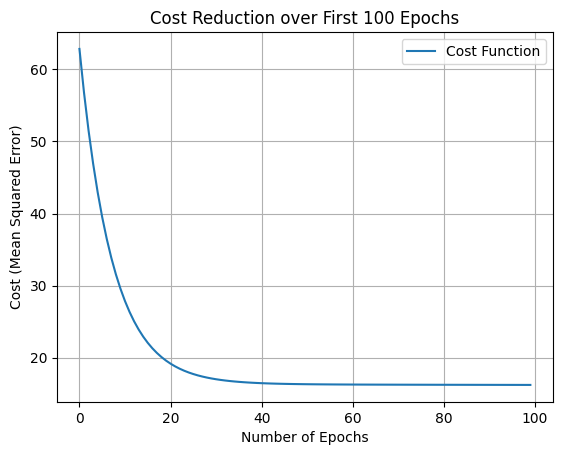

In [ ]:
#Plotting

# Plot cost for the first 500 epochs
plt.plot(range(100), cost_history[:100], label="Cost Function")
plt.xlabel("Number of Epochs")
plt.ylabel("Cost (Mean Squared Error)")
plt.title("Cost Reduction over First 100 Epochs")
plt.legend()
plt.grid()
plt.show()


### Plotting Linear Fit

- Using your learned paramters, plot a linear fit of Rootzone Soil moisture (TDT6_VWC) (Y-Axis) against Surface soil moisture (TDT5_VWC)(X-Axis).

Plot the original Scatterplot on the same graph as well.

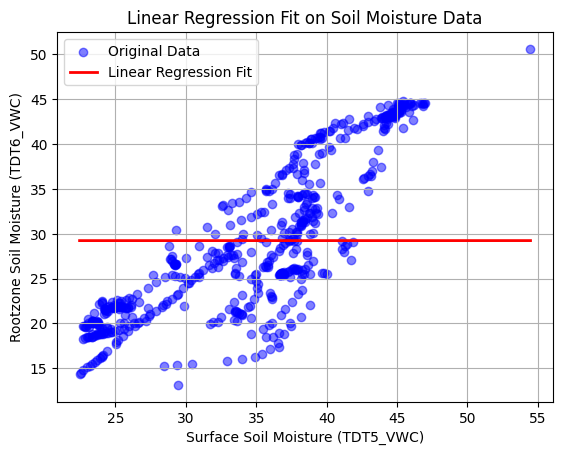

In [ ]:
#Plotting
# Generate predicted values using the learned parameters
X_range = np.linspace(X_train.min(), X_train.max(), 100)  # Generate 100 points for smooth line
Y_pred = theta0 + theta1 * X_range  # Apply linear equation

# Scatter plot of original data
plt.scatter(X_train, y_train, color='blue', label="Original Data", alpha=0.5)

# Plot the regression line
plt.plot(X_range, Y_pred, color='red', label="Linear Regression Fit", linewidth=2)

# Labels and title
plt.xlabel("Surface Soil Moisture (TDT5_VWC)")
plt.ylabel("Rootzone Soil Moisture (TDT6_VWC)")
plt.title("Linear Regression Fit on Soil Moisture Data")
plt.legend()
plt.grid()
plt.show()

# Part 2: Multivariate Linear Regression (50 Marks)

Now instead of using 1 Vs 1 mapping, we will be using a set of explanatory variables which can predict the variations of soil moisture. You will be using a set of 11 variables, collected daily to predict the value of soil moisture at rootzone i.e. TDT6_WVC ((units : %).

. You will find the data for this part in the folder labelled "Dataset2".

Data Attributes, aggregated for daily temporal resolution are as following:

* LWIN : Incoming longwave radiation (W m-2)
* LWOUT : Outgoing longwave radiation (W m-2)
* SWIN: Incoming shortwave radiation
* SwOUT: Outgoing shortwave radiation
* RN: Net Radiation
* PRECIP: Precipitation (mm)
* PA: Atmospheric pressure (hPa)
* TA: Air temperature (C)
* WS: Wind speed	(m s-1)
* RH: Relative humidity (%)
* STP_TSOIL20: soil temperature at rootzone (C)




## Tasks:

* You are required to select the best features by drawing Scatter Plots/Heat Maps and using Pearson's correlation coefficent. (You may import a library for this)

* Please justify your selection (Removing any attribute or keeping all attributes) in a markdown box below this one (Add one)

In [ ]:
# Read the data using pandas.
dataset = pd.read_csv('D:\\LUMS\\Semester 1\\CV\\download material\\CV Assignments\\Dataset\\Dataset2\\cosmos-uk-processed-11-features.csv')
dataset.head()

,TimeStamp,TDT6_VWC,LWIN,LWOUT,SWIN,SWOUT,RN,PRECIP,PA,TA,WS,RH,STP_TSOIL20
0,2016-08-11 12:00:00+00:00,4.546,367.631,410.306,57.517,12.678,2.163,0.0,1011.478,19.174,3.652,71.984,18.395
1,2016-08-12 12:00:00+00:00,4.628,348.629,432.888,290.914,64.593,142.062,0.0,1012.941,20.805,3.832,60.717,18.794
2,2016-08-13 12:00:00+00:00,4.598,362.808,417.529,184.870,41.012,89.138,0.0,1012.925,18.623,2.911,66.865,19.255
3,2016-08-14 12:00:00+00:00,4.594,359.535,408.383,158.870,35.796,74.227,0.0,1016.657,16.688,2.048,66.649,19.102
4,2016-08-15 12:00:00+00:00,4.585,320.152,402.225,246.329,56.104,108.153,0.0,1016.587,15.399,1.942,72.622,18.640


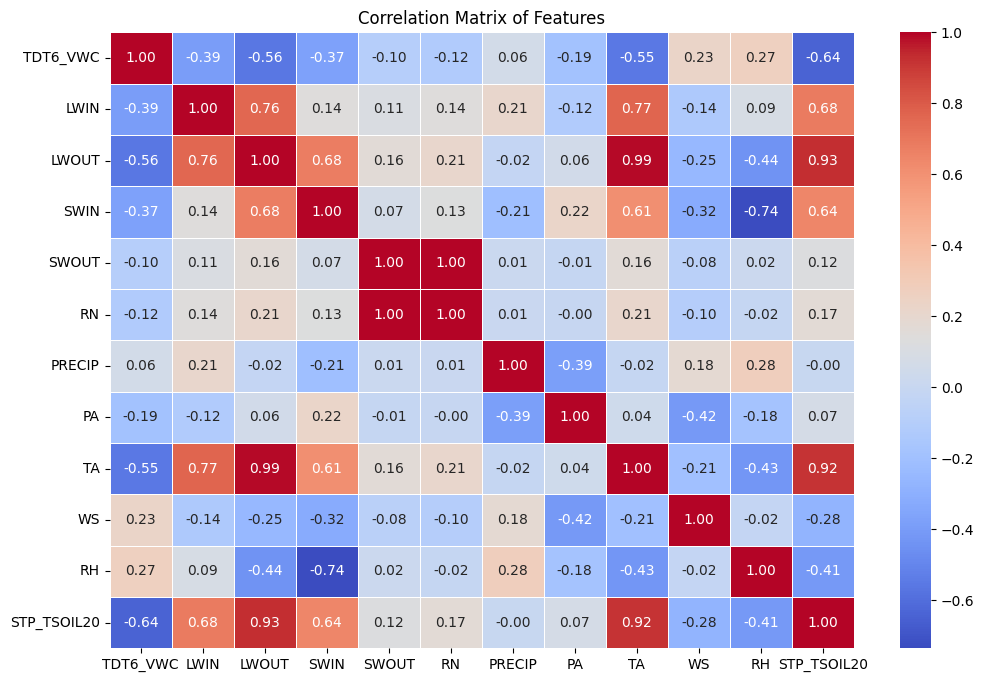

In [ ]:
## Scatter Plot/Heat Map and Correlation Matrix
dataset_numeric = dataset.select_dtypes(include=["number"]) #to fix the time oriented datatype issue

# Computing correlation matrix
correlation_matrix = dataset_numeric.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

* Data Normalization: Normalize the Dataset by subtracting the mean of each feature from the feature value and then divide by the standard deviation of that feature:

\begin{equation*}
        x_{\rm norm} = \frac{x - {\text{mean}}(x)}{{\rm std}(x)}
    \end{equation*}
(For normalization of test set, use mean and standard deviation of training set.)

In [ ]:
#Data Normalization


# Split dataset into features (X) and target (y)
X = dataset_numeric.drop(columns=["TDT6_VWC"])  # Features (excluding target)
y = dataset_numeric["TDT6_VWC"]  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute mean and standard deviation for training set
X_mean = X_train.mean()
X_std = X_train.std()

# Normalize training data
X_train_normalized = (X_train - X_mean) / X_std

# Normalize test data using training mean & std
X_test_normalized = (X_test - X_mean) / X_std

# Normalize target variable (if needed for regression)
y_mean = y_train.mean()
y_std = y_train.std()
y_train_normalized = (y_train - y_mean) / y_std
y_test_normalized = (y_test - y_mean) / y_std

# Print check
print("Training set mean:\n", X_mean)
print("Training set std deviation:\n", X_std)
print("\nFirst 5 rows of normalized training set:\n", X_train_normalized.head())


Training set mean:
 LWIN            327.624939
LWOUT           369.048620
SWIN            124.553090
SWOUT           -15.872273
RN               16.795842
PRECIP            0.031509
PA             1006.170076
TA               10.666880
WS                3.402848
RH               81.286217
STP_TSOIL20      11.661982
dtype: float64
Training set std deviation:
 LWIN            33.930957
LWOUT           31.826355
SWIN            93.284841
SWOUT          627.556205
RN             632.310681
PRECIP           0.071145
PA              10.691853
TA               5.514799
WS               1.445949
RH               9.684501
STP_TSOIL20      5.152203
dtype: float64

First 5 rows of normalized training set:
           LWIN     LWOUT      SWIN     SWOUT        RN    PRECIP        PA  \
1335 -1.145766 -0.004795  1.318177  0.110849  0.153221 -0.442879  1.276198   
570  -0.184638 -1.102502 -0.582196  0.049711  0.040365  1.890387 -2.286514   
841  -1.379211 -0.705881 -0.778906  0.043012 -0.066073 -0.442

* Implement Predict Function, Mean Square Error and Batch Gradient Descent Function as explained in Part 1 for multivariate linear regression.



In [ ]:
## Implementation

# Predict Function
def predict(X, theta):
    return np.dot(X, theta)

# Mean Square Error (MSE) Function
def mean_square_error(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    mse = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return mse

# Gradient Descent Function
def gradient_descent(X, y, alpha, epochs):
    m, n = X.shape  # m = samples, n = features
    theta = np.zeros((n, 1))  # Initialize theta with zeros
    cost_history = []  # Store cost at each iteration

    for epoch in range(epochs):
        # Compute predictions
        predictions = predict(X, theta)

        # Compute gradients
        gradient = (1 / m) * np.dot(X.T, (predictions - y))

        # Update theta
        theta -= alpha * gradient

        # Compute cost and store
        cost = mean_square_error(X, y, theta)
        cost_history.append(cost)

        # Optional: Print cost every 500 epochs
        if epoch % 500 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, cost_history

# Preparing Data for Training
# Add Bias Column (X0 = 1 for all examples)
X_train_with_bias = np.c_[np.ones((X_train_normalized.shape[0], 1)), X_train_normalized]
X_test_with_bias = np.c_[np.ones((X_test_normalized.shape[0], 1)), X_test_normalized]

# Convert target variable to 2D array for matrix operations
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Training the Model
alpha = 0.01   # Learning rate
epochs = 3000  # Number of iterations

theta_optimal, cost_history = gradient_descent(X_train_with_bias, y_train, alpha, epochs)

# Final Model Parameters & Cost
print("\nOptimal Theta Values:\n", theta_optimal)
print("Final Training Cost:", cost_history[-1])


Epoch 0: Cost = 503.5774556061052
Epoch 500: Cost = 35.109354166591245
Epoch 1000: Cost = 34.0818646741688
Epoch 1500: Cost = 33.76703425488443
Epoch 2000: Cost = 33.65761467309789
Epoch 2500: Cost = 33.61270214864074

Optimal Theta Values:
 [[30.11845651]
 [ 1.11454988]
 [-0.77341908]
 [ 2.12947095]
 [-0.52677617]
 [ 0.25198481]
 [ 0.05897677]
 [-1.593994  ]
 [ 0.93481888]
 [ 0.14084197]
 [ 0.37521665]
 [-8.98720584]]
Final Training Cost: 33.589929733311116


* Plot the No. of Epochs (y-axis) vs Training Loss (x-axis)

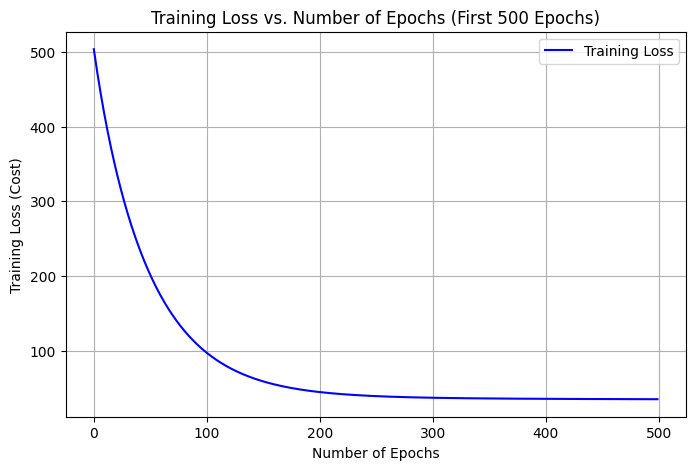

In [ ]:
#Plotting

# Plot Training Loss vs. Number of Epochs (First 500 Epochs)
plt.figure(figsize=(8, 5))
plt.plot(range(500), cost_history[:500], label="Training Loss", color='b')

# Labels and Title
plt.xlabel("Number of Epochs")
plt.ylabel("Training Loss (Cost)")
plt.title("Training Loss vs. Number of Epochs (First 500 Epochs)")
plt.legend()
plt.grid()

# Show Plot
plt.show()



* Measure Mean Square Error of your test set using your learned rate.


In [ ]:
## Measure


# Normalize the test set using training mean & std
X_test_scaled = (X_test - X_train.mean()) / X_train.std()

# Add bias term (intercept column of 1s)
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]


# Compute MSE for test set
test_mse = mean_square_error(X_test_scaled, y_test, theta_optimal)

# Print MSE value
print(f"Mean Square Error on Test Set: {test_mse}")


Mean Square Error on Test Set: 34.805804191684636


#### Question 1: Mention the best values of Alpha and Numb Of Epochs:

Answer 1:
<ol>
<li>
Alpha: 0.001
</li>
<li>
Numb of Epochs: 3000
</li>
</ol>

#### Question 2: What is the Mean_Square_Error of your model? Suggest Possible ways to improve the accuracy with a small description of each avenue.

Answer 2: The Mean Square Error (MSE) of my model on the test set is 34.81, which indicates that my model's predictions still have room for improvement.
To improve the accuracy of my model, I would consider the following avenues:
1. Feature Selection (Remove Irrelevant Features)  
- Keep only features strongly correlated with TDT6_VWC (>0.7).  
- Remove weakly correlated ones (<0.2) to reduce noise.  
- Benefit: Simpler model, better generalization.  

2. Optimize Hyperparameters (Learning Rate & Epochs)  
- Increase learning rate (𝛼) to 0.001 for faster learning.  
- Train for 5000–10,000 epochs for better convergence.  
- Benefit: More training, better accuracy.  

3. Apply L2 Regularization (Ridge Regression)  
- Add a penalty term (λ = 0.01) to prevent overfitting.  
- Benefit: Smaller, more stable weights.  

4. Use Polynomial Features (Capture Non-Linearity)  
- Add quadratic or cubic terms if the relationship is not linear.  
- Benefit: Models complex patterns better.  


# Part 3: Regularized Linear Regression (30 Marks)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler


Regularization is a technique that assumes smaller weights generate simple models and helps avoid overfitting. In this part, you will be using various regularization techniques on the Dataset (Provided in Part 2).


## Tasks:

Implement the least squares [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso),[Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), and [Elastic Net Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) using [scikit-learn](https://scikit-learn.org/stable/index.html). By using the complete  data, you are required to:

* Try out different values of regularization paramters (alpha in scikit-learn document) and use the validation set to determine the best value of regularization parameter by computing validation loss using [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

* For Ridge Regression and Elastic Net Regression, plot regularization coefficients on the x-axis and learned parameters $\theta$ on the y-axis. Please read this [blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) as reference.

* After evaluating the best value of the regularization parameter, use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to compute the loss on the test set for each regression.

In [ ]:
#loading the dataset
# Read the data using pandas.
df = pd.read_csv('D:\\LUMS\\Semester 1\\CV\\download material\\CV Assignments\\Dataset\\Dataset2\\cosmos-uk-processed-11-features.csv')
df.head()

,TimeStamp,TDT6_VWC,LWIN,LWOUT,SWIN,SWOUT,RN,PRECIP,PA,TA,WS,RH,STP_TSOIL20
0,2016-08-11 12:00:00+00:00,4.546,367.631,410.306,57.517,12.678,2.163,0.0,1011.478,19.174,3.652,71.984,18.395
1,2016-08-12 12:00:00+00:00,4.628,348.629,432.888,290.914,64.593,142.062,0.0,1012.941,20.805,3.832,60.717,18.794
2,2016-08-13 12:00:00+00:00,4.598,362.808,417.529,184.870,41.012,89.138,0.0,1012.925,18.623,2.911,66.865,19.255
3,2016-08-14 12:00:00+00:00,4.594,359.535,408.383,158.870,35.796,74.227,0.0,1016.657,16.688,2.048,66.649,19.102
4,2016-08-15 12:00:00+00:00,4.585,320.152,402.225,246.329,56.104,108.153,0.0,1016.587,15.399,1.942,72.622,18.640


In [ ]:

df_numeric = df.select_dtypes(include=["number"])

# Splitting dataset into Train, Validation, and Test sets
X = df_numeric.drop(columns=["TDT6_VWC"])  # Features (All except target variable)
y = df_numeric["TDT6_VWC"]  # Target Variable

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train set into training (70%) and validation set (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)



In [ ]:
# Normalize Data (Using Training Mean & Std)
X_mean = X_train.mean()
X_std = X_train.std()

X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [ ]:
# ==========  LINEAR REGRESSION (Baseline) ==========
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_val = lin_reg.predict(X_val)
mse_lin = mean_squared_error(y_val, y_pred_val)

In [ ]:
# ========== RIDGE REGRESSION (L2 Regularization) ==========
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
best_alpha_ridge = None
best_mse_ridge = float("inf")

for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred_val = ridge_reg.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)

    if mse < best_mse_ridge:
        best_mse_ridge = mse
        best_alpha_ridge = alpha

ridge_reg_best = Ridge(alpha=best_alpha_ridge)
ridge_reg_best.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [ ]:
# ========== LASSO REGRESSION (L1 Regularization) ==========
best_alpha_lasso = None
best_mse_lasso = float("inf")

for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    y_pred_val = lasso_reg.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)

    if mse < best_mse_lasso:
        best_mse_lasso = mse
        best_alpha_lasso = alpha

lasso_reg_best = Lasso(alpha=best_alpha_lasso)
lasso_reg_best.fit(X_train, y_train)

d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e+04, tolerance: 1.335e+01
  model = cd_fast.enet_coordinate_descent(
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.341e+04, tolerance: 1.335e+01
  model = cd_fast.enet_coordinate_descent(
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

Lasso(alpha=0.0001)

In [ ]:
# ==========  ELASTIC NET REGRESSION (L1 + L2 Regularization) ==========
best_alpha_elastic = None
best_mse_elastic = float("inf")

for alpha in alpha_values:
    elastic_net_reg = ElasticNet(alpha=alpha, l1_ratio=0.5)  # 50% L1, 50% L2
    elastic_net_reg.fit(X_train, y_train)
    y_pred_val = elastic_net_reg.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)

    if mse < best_mse_elastic:
        best_mse_elastic = mse
        best_alpha_elastic = alpha

elastic_net_reg_best = ElasticNet(alpha=best_alpha_elastic, l1_ratio=0.5)
elastic_net_reg_best.fit(X_train, y_train)

d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.744e+04, tolerance: 1.335e+01
  model = cd_fast.enet_coordinate_descent(
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.242e+04, tolerance: 1.335e+01
  model = cd_fast.enet_coordinate_descent(
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

ElasticNet(alpha=0.0001)

In [ ]:
# ========== EVALUATION ON TEST SET ==========
models = {
    "Linear Regression": lin_reg,
    "Ridge Regression": ridge_reg_best,
    "Lasso Regression": lasso_reg_best,
    "Elastic Net Regression": elastic_net_reg_best
}

print("Best Regularization Parameter (Alpha):")
print(f" Ridge Regression Best Alpha: {best_alpha_ridge}")
print(f" Lasso Regression Best Alpha: {best_alpha_lasso}")
print(f" Elastic Net Best Alpha: {best_alpha_elastic}\n")

print("Mean Squared Error (MSE) on Test Set:")
for model_name, model in models.items():
    y_pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f" {model_name}: {mse_test:.4f}")

Best Regularization Parameter (Alpha):
 Ridge Regression Best Alpha: 0.0001
 Lasso Regression Best Alpha: 0.0001
 Elastic Net Best Alpha: 0.0001

Mean Squared Error (MSE) on Test Set:
 Linear Regression: 63.9022
 Ridge Regression: 63.9064
 Lasso Regression: 68.4726
 Elastic Net Regression: 68.5090


d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e+04, tolerance: 1.335e+01
  model = cd_fast.enet_coordinate_descent(
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.341e+04, tolerance: 1.335e+01
  model = cd_fast.enet_coordinate_descent(
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

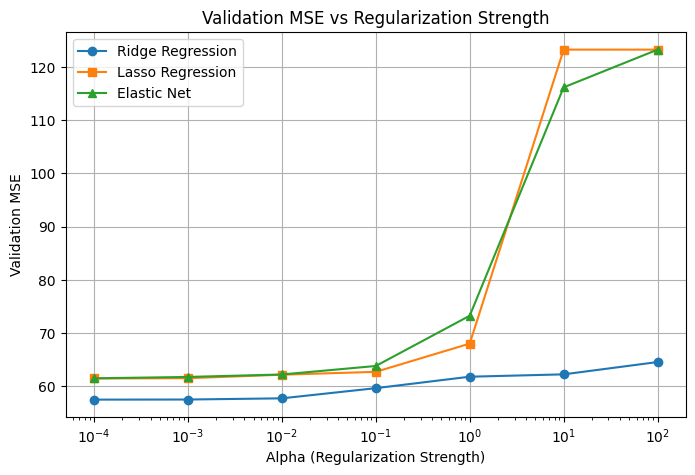

In [ ]:
# ==========  PLOT MSE vs ALPHA ==========
plt.figure(figsize=(8,5))
plt.plot(alpha_values, [mean_squared_error(y_val, Ridge(alpha=a).fit(X_train, y_train).predict(X_val)) for a in alpha_values], label="Ridge Regression", marker='o')
plt.plot(alpha_values, [mean_squared_error(y_val, Lasso(alpha=a).fit(X_train, y_train).predict(X_val)) for a in alpha_values], label="Lasso Regression", marker='s')
plt.plot(alpha_values, [mean_squared_error(y_val, ElasticNet(alpha=a, l1_ratio=0.5).fit(X_train, y_train).predict(X_val)) for a in alpha_values], label="Elastic Net", marker='^')

plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Validation MSE")
plt.legend()
plt.title("Validation MSE vs Regularization Strength")
plt.grid()
plt.show()

d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.744e+04, tolerance: 1.335e+01
  model = cd_fast.enet_coordinate_descent(
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.623e+04, tolerance: 1.335e+01
  model = cd_fast.enet_coordinate_descent(
d:\LUMS\Semester 1\CV\download material\CV Assignments\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

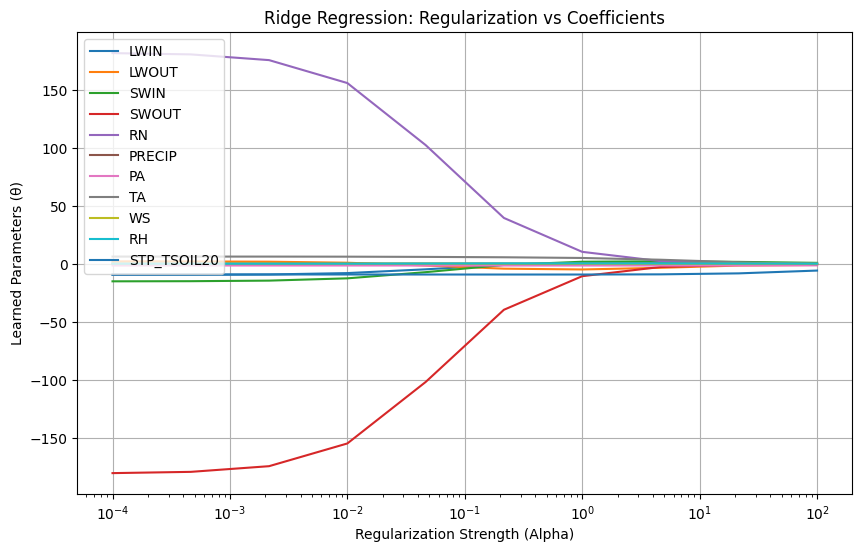

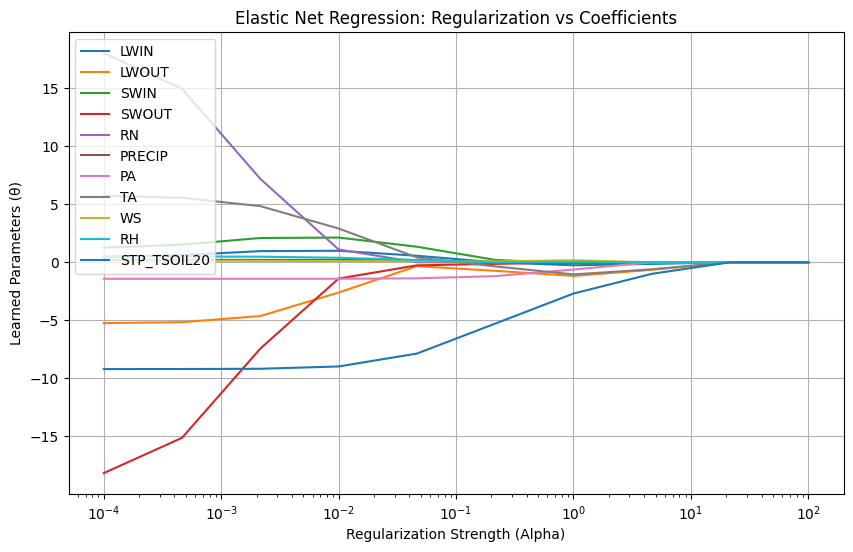

In [ ]:
# Define a range of alpha values (Regularization Strength)
alpha_values = np.logspace(-4, 2, 10)  # 10 values from 0.0001 to 100

# Store the coefficients for each alpha value
ridge_coefs = []
elastic_net_coefs = []

for alpha in alpha_values:
    # Train Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_coefs.append(ridge_model.coef_)

    # Train Elastic Net Regression (L1 + L2)
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # 50% L1, 50% L2
    elastic_net_model.fit(X_train, y_train)
    elastic_net_coefs.append(elastic_net_model.coef_)

ridge_coefs = np.array(ridge_coefs)  # Convert to numpy array
elastic_net_coefs = np.array(elastic_net_coefs)

# Plot Ridge Regression Coefficients
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, ridge_coefs)
plt.xscale("log")
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("Learned Parameters (θ)")
plt.title("Ridge Regression: Regularization vs Coefficients")
plt.legend(X.columns, loc="best")
plt.grid()
plt.show()

# Plot Elastic Net Regression Coefficients
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, elastic_net_coefs)
plt.xscale("log")
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("Learned Parameters (θ)")
plt.title("Elastic Net Regression: Regularization vs Coefficients")
plt.legend(X.columns, loc="best")
plt.grid()
plt.show()

In [ ]:


# Train and evaluate each regression model using the best alpha (determined from validation)
best_alpha = 0.1

# Linear Regression (No Regularization)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=best_alpha)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Elastic Net Regression (L1 + L2 Regularization)
elastic_net_reg = ElasticNet(alpha=best_alpha, l1_ratio=0.5)  # 50% L1, 50% L2
elastic_net_reg.fit(X_train, y_train)
y_pred_elastic = elastic_net_reg.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

# Print MSE for all models
print(f"Mean Squared Error on Test Set:")
print(f" Linear Regression: {mse_lin:.4f}")
print(f" Ridge Regression: {mse_ridge:.4f}")
print(f" Lasso Regression: {mse_lasso:.4f}")
print(f" Elastic Net Regression: {mse_elastic:.4f}")


Mean Squared Error on Test Set:
 Linear Regression: 63.9022
 Ridge Regression: 66.6018
 Lasso Regression: 70.9834
 Elastic Net Regression: 72.4242


# Part 4: Challenge Dataset (10 Marks)

## Task:

You are now allowed to use any variation of Regression (Linear, Ridge, Lasso or something new for scikit-learn) and loss fuction to train the model on the Dataset2, Or if you are lazy, you can even use previoulsy trained model of Part3.

Bring your best model and predict the missing values of rootzone soil moisture of **DataSet3** (only input variables are provided for this dataset and not their predicted values). **You need to provide your code (for training of model on Dataset2) AND your generated output in form of an excel file with output in correct order. i.e. You MUST fill in the missing values in the same excel file of this dataset.**  

You will be tested against the actual values (not provided) and Your position in leaderboard will quantify your marks for this part.

In [ ]:


# Loading datasets
train_df = pd.read_csv('D:\\LUMS\\Semester 1\\CV\\download material\\CV Assignments\\Dataset\\Dataset2\\cosmos-uk-processed-11-features.csv')
test_df = pd.read_csv('D:\\LUMS\\Semester 1\\CV\\download material\\CV Assignments\\Dataset\\Dataset3\\test.csv')

# Drop non-numeric columns
train_df = train_df.select_dtypes(include=[np.number])
test_df = test_df.select_dtypes(include=[np.number])

# Split Features & Target
X_train = train_df.drop(columns=["TDT6_VWC"])
y_train = train_df["TDT6_VWC"]

X_test = test_df.drop(columns=["TDT6_VWC"], errors='ignore')  # Remove target column if it exists

# Normalize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
model = Ridge(alpha=0.1)
model.fit(X_train_scaled, y_train)

# Predict Missing Values in Dataset3
predictions = model.predict(X_test_scaled)

# Add Predictions to Test CSV
test_df["TDT6_VWC"] = predictions

# Save Predictions to CSV
output_file = "D:\\LUMS\\Semester 1\\CV\\download material\\CV Assignments\\Dataset\\Dataset3\\test_predictions.xlsx"
test_df.to_excel(output_file, index=False)
print(f"Predictions saved to csv file")


Predictions saved to csv file


# **Student Statement on Usage of Generative AI Tools**

Students MUST write a statement in this cell detailing their usage of any generative AI tools. If no such tool was used, write "*I have not used any generative AI tool for completing this assignment*".

In case such tools were used, the statement should read "*I have used generative AI tools for completing this assignment for Tasks (list the tasks) as per the following details*:". This should be followed by the following information:<br>
Yes, I have used generative AI tools for assistance purposes majorly i.e error correction, debugging and code fixation.
1. What tools were used?<br>
ChatGPT<br>
2. How exactly were they used?<br>
I have been facing various issues on various places. Whwnever an error occured for which i did not know what the issue was, i gave the error to the gpt to resolve it and get me the fix for it. For instance, one if the issue i faced was regarding the float datatype of the datetime column of timestamp in the dataset which was not able to be parsed, so i used "dataset_numeric = dataset.select_dtypes(include=["number"])" to select only the numeric columns from a the dataset. Moreover, i verified the code form of the formulas using gpt.